In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
import warnings
warnings.filterwarnings('ignore')

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#from mlxtend.preprocessing import TransactionEncoder

In [3]:
movie=pd.read_csv("mymovies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
#Creating new dataframe from existing dataframe
movie_new=movie[['Sixth Sense','Gladiator','LOTR1','Harry Potter1','Patriot','LOTR2','Harry Potter2','LOTR','Braveheart','Green Mile']].copy()

#new_df = old_df[['col1','col2']].copy()

movie_new

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
for i in movie_new.columns:
    print(i)
    ddd=(movie_new[i].value_counts())
    print(ddd)

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64
Gladiator
1    7
0    3
Name: Gladiator, dtype: int64
LOTR1
0    8
1    2
Name: LOTR1, dtype: int64
Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64
Patriot
1    6
0    4
Name: Patriot, dtype: int64
LOTR2
0    8
1    2
Name: LOTR2, dtype: int64
Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64
LOTR
0    9
1    1
Name: LOTR, dtype: int64
Braveheart
0    9
1    1
Name: Braveheart, dtype: int64
Green Mile
0    8
1    2
Name: Green Mile, dtype: int64


## Apriori Algorithm

In [7]:
frequent_items1 = apriori(movie_new, min_support=.1, use_colnames=True)
frequent_items1['length'] = frequent_items1['itemsets'].apply(lambda x: len(x))
frequent_items1

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


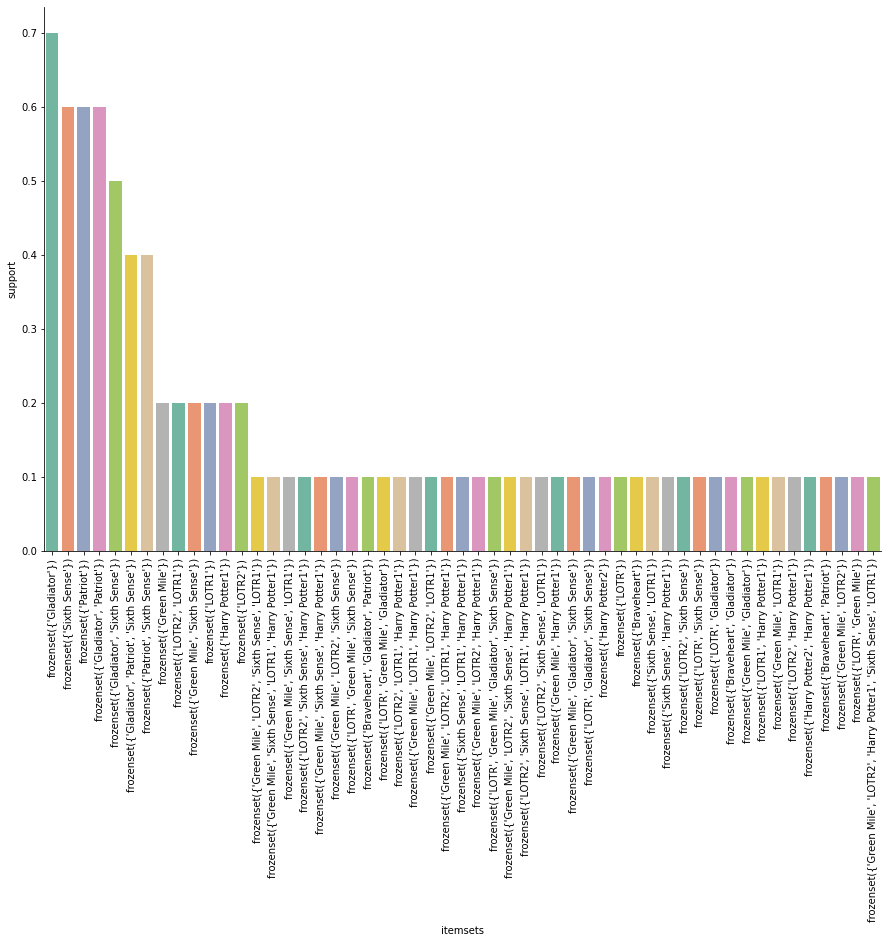

In [8]:
pal = sns.color_palette("Set2")
plt.figure(figsize = (15, 10))
sorted_df1 = frequent_items1.sort_values(by='support', ascending=False) # Sorting values in the dataset
sns.barplot(y=sorted_df1["support"], x=sorted_df1["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [9]:
frequent_items2 = apriori(movie_new, min_support=.2, use_colnames=True)
frequent_items2['length'] = frequent_items2['itemsets'].apply(lambda x: len(x))
frequent_items2

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


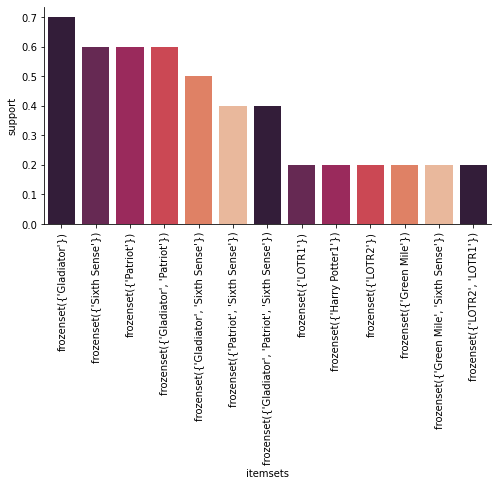

In [10]:
pal = sns.color_palette("rocket")
plt.figure(figsize = (8, 4))
sorted_df2 = frequent_items2.sort_values(by='support', ascending=False)
sns.barplot(y=sorted_df2["support"], x=sorted_df2["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [11]:
frequent_items2.describe()


,support,length
count,13.000000,13.000000
mean,0.384615,1.538462
std,0.195133,0.660225
min,0.200000,1.000000
25%,0.200000,1.000000
50%,0.400000,1.000000
75%,0.600000,2.000000
max,0.700000,3.000000


Text(0.5, 1.0, 'Boxplot')

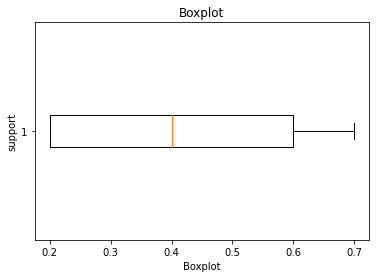

In [12]:
plt.boxplot(frequent_items2['support'],vert =False);plt.ylabel("support");plt.xlabel("Boxplot");plt.title("Boxplot")  # for vertical

In [13]:
frequent_items3 = apriori(movie_new, min_support=.3, use_colnames=True)
frequent_items3['length'] = frequent_items3['itemsets'].apply(lambda x: len(x))
frequent_items3

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Gladiator, Sixth Sense)",2
4,0.4,"(Patriot, Sixth Sense)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Gladiator, Patriot, Sixth Sense)",3


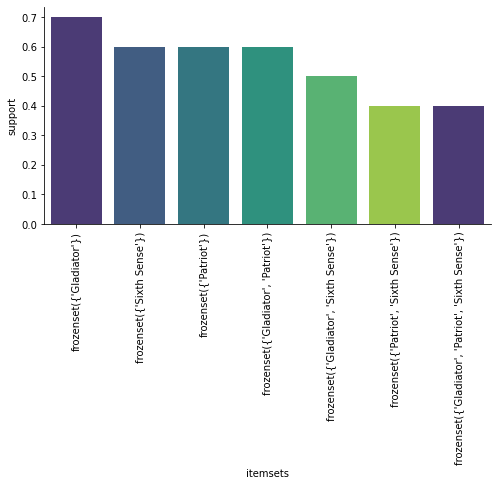

In [14]:
pal = sns.color_palette("viridis")
plt.figure(figsize = (8, 4))
sorted_df3 = frequent_items3.sort_values(by='support', ascending=False)
sns.barplot(y=sorted_df3["support"], x=sorted_df3["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [15]:
rules1 = association_rules(frequent_items1, metric="lift", min_threshold=1)
rules1
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
202,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
127,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
130,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
203,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
160,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
131,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
198,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
134,(LOTR),"(Green Mile, Gladiator, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
rules2 = association_rules(frequent_items2, metric="lift", min_threshold=1)
rules2
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [17]:
frequent_items2[ (frequent_items2['length'] == 2) &
                   (frequent_items2['support'] >= 0.5) ]

,support,itemsets,length
7,0.5,"(Gladiator, Sixth Sense)",2
10,0.6,"(Gladiator, Patriot)",2


In [18]:
rules3 = association_rules(frequent_items3, metric="lift", min_threshold=1)
rules3
rules3.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [19]:
frequent_items3[ (frequent_items3['length'] == 2) &
                   (frequent_items3['support'] >= 0.5) ]

,support,itemsets,length
3,0.5,"(Gladiator, Sixth Sense)",2
5,0.6,"(Gladiator, Patriot)",2


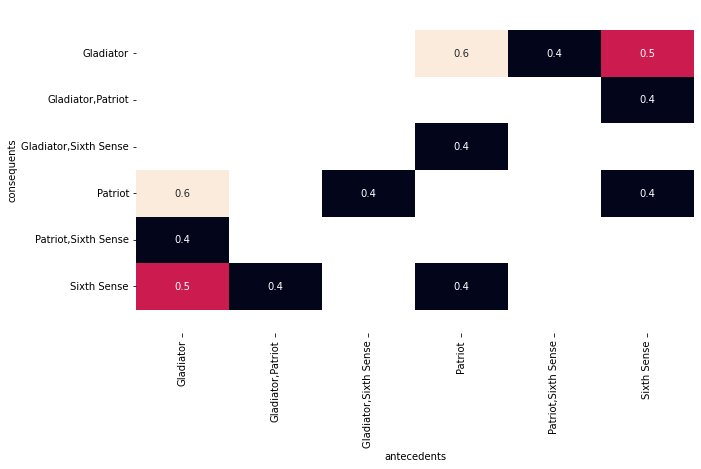

In [20]:
# Convert antecedents and consequents into strings
rules3['antecedents'] = rules3['antecedents'].apply(lambda a: ','.join(list(a)))
rules3['consequents'] = rules3['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules3.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

# The association rules we can come up with based on the above analysis are given below when min support is 50% lift is greater than 1 with high confidence :
## 1. if Patriot then Gladiator
## 2. if Gladiator then Patriot
## 3. if Sixth Sense then Gladiator
## 4. if Gladiator then Sixth Sense